In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = '/content/drive/MyDrive/insurance (1).csv'
df = pd.read_csv(data)  

In [ ]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
#cheacking shape
df.shape

(986, 11)

In [ ]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<Axes: xlabel='PremiumPrice', ylabel='Count'>

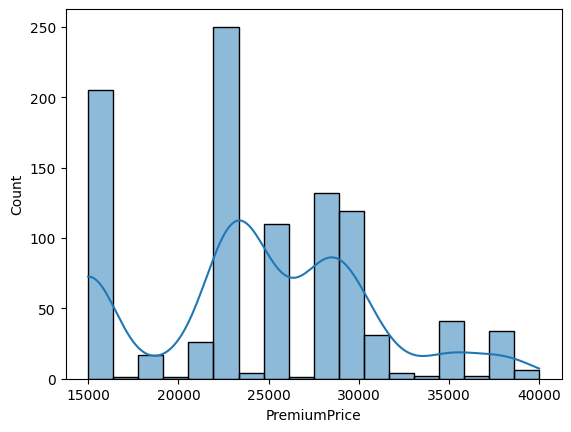

In [ ]:
# Distribution of data
sns.histplot(df['PremiumPrice'],kde=True)

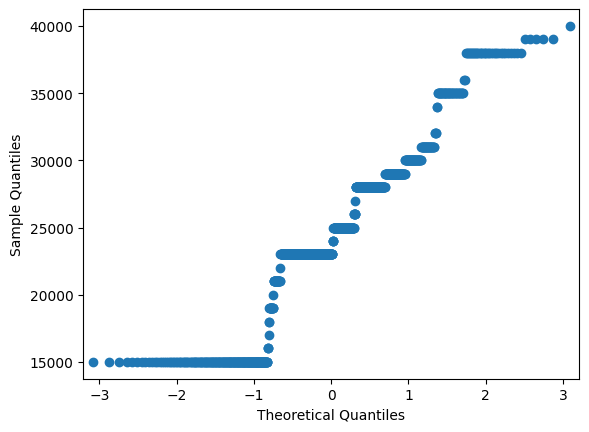

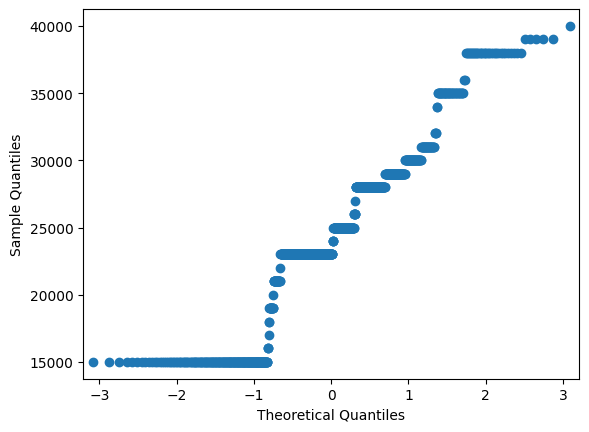

In [ ]:
# cheacking normality of data
import statsmodels.api as sm
figsize = (4,4)
sm.qqplot(df['PremiumPrice'])

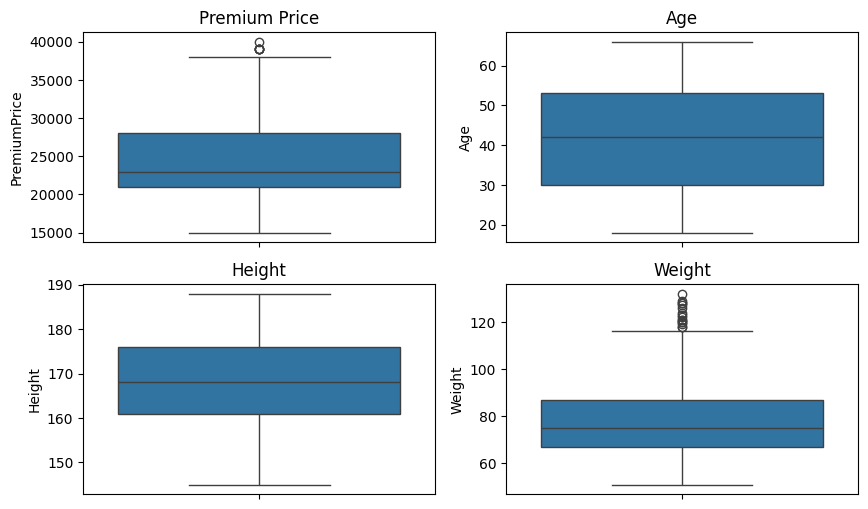

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2x2 grid of subplots

sns.boxplot(df['PremiumPrice'],ax=axes[0, 0])
axes[0, 0].set_title('Premium Price')

sns.boxplot(df['Age'],ax=axes[0, 1])
axes[0, 1].set_title('Age')

sns.boxplot(df['Height'],ax=axes[1,0])
axes[1,0].set_title('Height')

sns.boxplot(df['Weight'],ax=axes[1, 1])
axes[1, 1].set_title('Weight')
plt.show()

In [ ]:
# Removing outlier using z score
from scipy.stats import zscore
df['Z_Score_Weight'] = zscore(df['Weight'])
df['Z_Score_Premium'] = zscore(df['PremiumPrice'])

df_no_outliers = df[(df['Z_Score_Weight'] < 3) & (df['Z_Score_Weight'] > -3) & (df['Z_Score_Premium'] < 3) & (df['Z_Score_Premium'] > -3)]
df = df_no_outliers
df.drop(['Z_Score_Weight','Z_Score_Premium'],axis=1,inplace=True)

df.head()

<ipython-input-10-fafeac4222f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Z_Score_Weight','Z_Score_Premium'],axis=1,inplace=True)


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


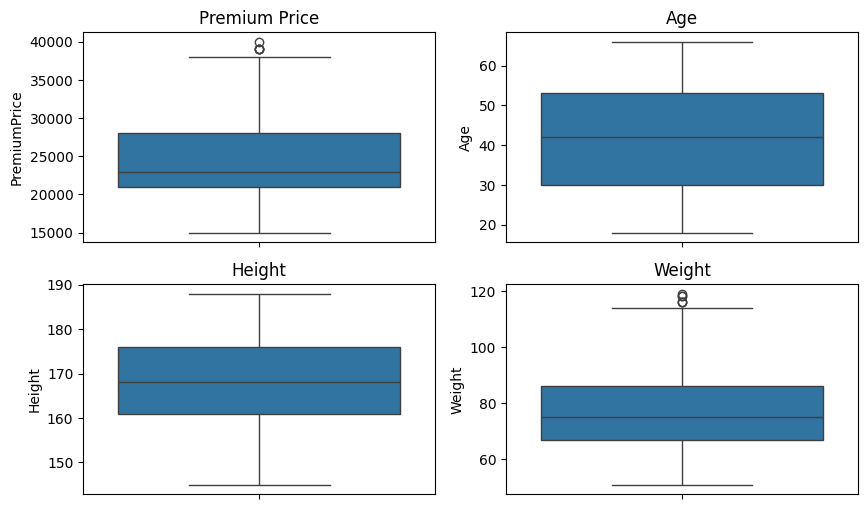

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2x2 grid of subplots

sns.boxplot(df['PremiumPrice'],ax=axes[0, 0])
axes[0, 0].set_title('Premium Price')

sns.boxplot(df['Age'],ax=axes[0, 1])
axes[0, 1].set_title('Age')

sns.boxplot(df['Height'],ax=axes[1,0])
axes[1,0].set_title('Height')

sns.boxplot(df['Weight'],ax=axes[1, 1])
axes[1, 1].set_title('Weight')
plt.show()

<Axes: >

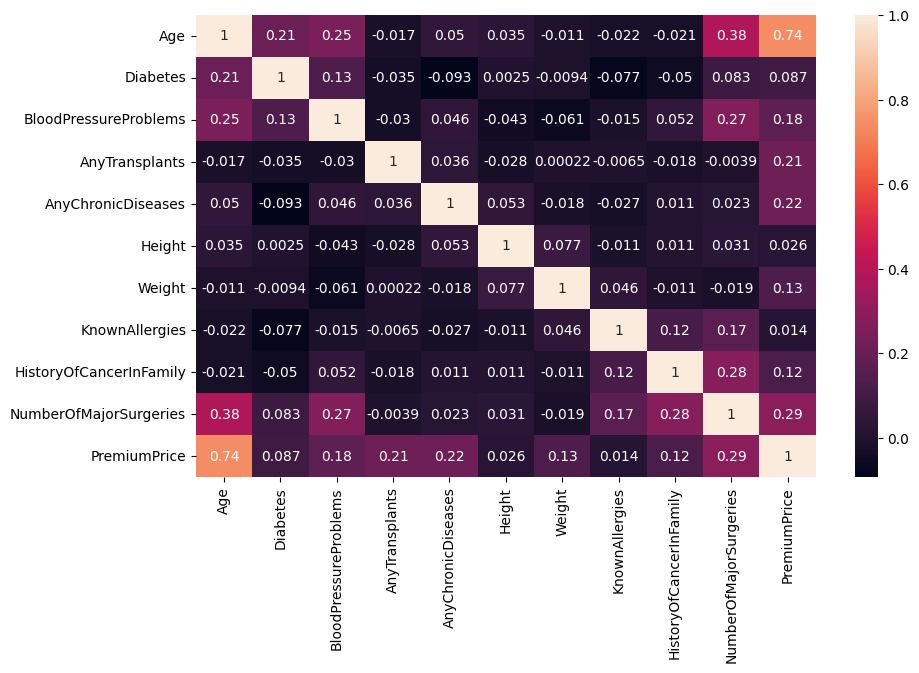

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(method='spearman'),annot=True)

### Statistical Analysis

In [ ]:
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from scipy.stats import kstest # KS test for Normality
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu  # alternative of t test for non normally distributed data


In [ ]:
# cheacking difference between premium price on Diabetes and Non Diabetes
Yes = df[df['Diabetes'] == 1]['PremiumPrice']
No = df[df['Diabetes'] == 0]['PremiumPrice']
u_stat, p_value = mannwhitneyu(Yes, No, alternative='two-sided')
print(f"Non parametric U-statistic: {u_stat}, P-value: {p_value}")

statistic,pvalue = ttest_ind(Yes,No,alternative='two-sided')
print(f"parametric t-statistic: {statistic}, P-value: {p_value}")

# there are diffrence of  Diabetes and Non Diabetes on premium

Non parametric U-statistic: 127091.0, P-value: 0.0065525875842061074
parametric t-statistic: 2.4199905843457055, P-value: 0.0065525875842061074


In [ ]:
# cheacking difference between premium price on BloodPressureProblems
Yes = df[df['BloodPressureProblems'] == 1]['PremiumPrice']
No = df[df['BloodPressureProblems'] == 0]['PremiumPrice']
u_stat, p_value = mannwhitneyu(Yes, No, alternative='two-sided')
print(f"Non parametric U-statistic: {u_stat}, P-value: {p_value}")

statistic,pvalue = ttest_ind(Yes,No,alternative='two-sided')
print(f"parametric t-statistic: {statistic}, P-value: {p_value}")

# there are diffrence in premium in BloodPressureProblems

Non parametric U-statistic: 141517.0, P-value: 4.142375666032341e-08
parametric t-statistic: 5.233531078720006, P-value: 4.142375666032341e-08


In [ ]:
# cheacking difference between premium price on AnyChronicDiseases
Yes = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
No = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']
u_stat, p_value = mannwhitneyu(Yes, No, alternative='two-sided')
print(f"Non parametric U-statistic: {u_stat}, P-value: {p_value}")

statistic,pvalue = ttest_ind(Yes,No,alternative='two-sided')
print(f"parametric t-statistic: {statistic}, P-value: {p_value}")

# there are diffrence in premium in AnyChronicDiseases

Non parametric U-statistic: 93247.0, P-value: 1.6377368555544654e-11
parametric t-statistic: 6.770380774627892, P-value: 1.6377368555544654e-11


In [ ]:
# cheacking difference between premium price on AnyTransplants
Yes = df[df['AnyTransplants'] == 1]['PremiumPrice']
No = df[df['AnyTransplants'] == 0]['PremiumPrice']
u_stat, p_value = mannwhitneyu(Yes, No, alternative='two-sided')
print(f"Non parametric U-statistic: {u_stat}, P-value: {p_value}")

statistic,pvalue = ttest_ind(Yes,No,alternative='two-sided')
print(f"parametric t-statistic: {statistic}, P-value: {p_value}")

# there are diffrence in premium in AnyTransplants

Non parametric U-statistic: 37994.5, P-value: 2.642437378350939e-11
parametric t-statistic: 9.293863689078139, P-value: 2.642437378350939e-11


In [ ]:
# cheacking difference between premium price on HistoryOfCancerInFamily
Yes = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
No = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']

u_stat, p_value = mannwhitneyu(Yes, No, alternative='two-sided')
print(f"Non parametric U-statistic: {u_stat}, P-value: {p_value}")

statistic,pvalue = ttest_ind(Yes,No,alternative='two-sided')
print(f"parametric t-statistic: {statistic}, P-value: {p_value}")

# there are diffrence in premium in HistoryOfCancerInFamily

Non parametric U-statistic: 59095.5, P-value: 0.00014703347889582314
parametric t-statistic: 2.489642031084703, P-value: 0.00014703347889582314


In [ ]:
# cheacking difference between premium price on NumberOfMajorSurgeries

zero = df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice']
one = df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice']
two = df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice']
three = df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice']
h_stat,p_value = kruskal(zero,one,two,three)
print(f"H-statistic: {h_stat}, P-value: {p_value}")

# there are diffrence in premium in NumberOfMajorSurgeries

H-statistic: 34.64193934993495, P-value: 1.4500188685178583e-07


In [ ]:
tab = pd.crosstab(df['AnyChronicDiseases'],df['HistoryOfCancerInFamily'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.0459071047879219, pvalue=0.8303447509009425, dof=1, expected_freq=array([[702.672148,  92.327852],
       [157.327852,  20.672148]]))

In [ ]:
tab = pd.crosstab(df['AnyChronicDiseases'],df['BloodPressureProblems'])
chi2_contingency(tab)


Chi2ContingencyResult(statistic=1.8025244364066284, pvalue=0.1794076021992751, dof=1, expected_freq=array([[422.42034943, 372.57965057],
       [ 94.57965057,  83.42034943]]))

In [ ]:
tab = pd.crosstab(df['AnyChronicDiseases'],df['NumberOfMajorSurgeries'])
chi2_contingency(tab)


Chi2ContingencyResult(statistic=6.246884579786533, pvalue=0.10019744252633789, dof=3, expected_freq=array([[386.4696814 , 299.86125385,  95.59609455,  13.0729702 ],
       [ 86.5303186 ,  67.13874615,  21.40390545,   2.9270298 ]]))

In [ ]:
tab = pd.crosstab(df['AnyChronicDiseases'],df['KnownAllergies'])
chi2_contingency(tab)


Chi2ContingencyResult(statistic=0.5685077555373954, pvalue=0.45085250460076787, dof=1, expected_freq=array([[624.23432682, 170.76567318],
       [139.76567318,  38.23432682]]))

In [ ]:
tab = pd.crosstab(df['AnyTransplants'],df['NumberOfMajorSurgeries'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.5195701818909032, pvalue=0.9145713660216055, dof=3, expected_freq=array([[446.74922919, 346.63206578, 110.50668037,  15.11202467],
       [ 26.25077081,  20.36793422,   6.49331963,   0.88797533]]))

In [ ]:
tab = pd.crosstab(df['KnownAllergies'],df['NumberOfMajorSurgeries'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=108.0165372934946, pvalue=2.9319621958639457e-23, dof=3, expected_freq=array([[371.39979445, 288.16855087,  91.8684481 ,  12.56320658],
       [101.60020555,  78.83144913,  25.1315519 ,   3.43679342]]))

In [ ]:
tab = pd.crosstab(df['AnyTransplants'],df['NumberOfMajorSurgeries'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.5195701818909032, pvalue=0.9145713660216055, dof=3, expected_freq=array([[446.74922919, 346.63206578, 110.50668037,  15.11202467],
       [ 26.25077081,  20.36793422,   6.49331963,   0.88797533]]))

In [ ]:
tab = pd.crosstab(df['Diabetes'],df['BloodPressureProblems'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=16.134437060460705, pvalue=5.900138721144729e-05, dof=1, expected_freq=array([[298.61664954, 263.38335046],
       [218.38335046, 192.61664954]]))

In [ ]:
tab = pd.crosstab(df['HistoryOfCancerInFamily'],df['NumberOfMajorSurgeries'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=154.92803760232653, pvalue=2.2781678190499876e-33, dof=3, expected_freq=array([[418.06783145, 324.37821172, 103.41212744,  14.14182939],
       [ 54.93216855,  42.62178828,  13.58787256,   1.85817061]]))

In [ ]:
tab = pd.crosstab(df['KnownAllergies'],df['NumberOfMajorSurgeries'])
chi2_contingency(tab)

Chi2ContingencyResult(statistic=108.0165372934946, pvalue=2.9319621958639457e-23, dof=3, expected_freq=array([[371.39979445, 288.16855087,  91.8684481 ,  12.56320658],
       [101.60020555,  78.83144913,  25.1315519 ,   3.43679342]]))

In [ ]:
df['BMI'] = round(df['Weight'] / ((df['Height']*0.01)**2),2)

### Regression analysis

In [ ]:
x = df.drop(['PremiumPrice','BMI','BloodPressureProblems','Height'],axis=1)
y = df['PremiumPrice']

In [ ]:
x = df.drop(['PremiumPrice'],axis=1)
y = df['PremiumPrice']

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     161.0
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          3.34e-209
Time:                        09:37:52   Log-Likelihood:                -9370.6
No. Observations:                 973   AIC:                         1.877e+04
Df Residuals:                     961   BIC:                         1.882e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [ ]:
from sklearn.preprocessing import  StandardScaler
std = StandardScaler()
X = std.fit_transform(x)
x_scaled = pd.DataFrame(X,columns=x.columns)



In [ ]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear_regression' : LinearRegression(),
    'Lasso_regression' : Lasso(alpha=0.01),
    'ridge_regression' : Ridge(alpha=0.01)
    }

for name, model in models.items():
    model.fit(x_train,y_train)
    # prediction = model.predict(pd.DataFrame(x_test,columns = x.columns))
    prediction = model.predict(x_test)
    mse = mean_squared_error(y_test,prediction)
    r2 = r2_score(y_test, prediction)

    print(name, ':', mse, 'and', r2)

Linear_regression : 14454792.375798725 and 0.6126024766601965
Lasso_regression : 14454554.636799086 and 0.6126088482148524
ridge_regression : 14454190.333286757 and 0.612618611778019


### applying Decission Tree




In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
d_model = regressor.fit(x_train, y_train)

In [ ]:
d_pred = d_model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,d_pred)
mae = np.mean(np.abs(y_test - d_pred))
r2 = r2_score(y_test, d_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 10728205.128205128
Mean Absolute Error 820.5128205128206
R-squared: 0.71247735778575


### applying Random Forest

In [ ]:
# Create a random forest regresson
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')


In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
best_rf = grid_search.best_estimator_
rf_pred = best_rf.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, rf_pred)
mae = np.mean(np.abs(y_test - rf_pred))
r2 = r2_score(y_test, rf_pred)

print(f"Mean Absolute Error {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error 973.3673257127629
Mean Squared Error: 6959882.42202744
R-squared: 0.8134707754402679
